In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_20680\1341166818.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [9]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_20680\2375686048.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_20680\2375686048.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [10]:
print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [ ]:
df.drop('Loan_ID', axis=1, inplace=True)

In [41]:
df   # raw dataframe


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,1,False,True
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,False,False
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,False,True
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,False,True
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,1,False,False
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,1,False,False
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,1,False,True
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,1,False,True


In [43]:
from sklearn.preprocessing import LabelEncoder

label_cols = [
    "Gender",
    "Married",
    "Education",
    "Self_Employed",
    "Loan_Status"   # target encoding is fine
]

le = LabelEncoder()
for col in label_cols:
    # encode only if column exists and appears non-numeric (e.g. object)
    if col in df.columns and df[col].dtype == object:
        df[col] = le.fit_transform(df[col])

# Ordinal encoding for Dependents if present (and not already numeric)
if "Dependents" in df.columns:
    # replace only if values contain '3+' or are strings
    if df["Dependents"].dtype == object:
        df["Dependents"] = df["Dependents"].replace("3+", 3).astype(int)
    else:
        # ensure integer dtype
        df["Dependents"] = df["Dependents"].astype(int)

# One-hot encode Property_Area only if column exists
if "Property_Area" in df.columns:
    df = pd.get_dummies(df, columns=["Property_Area"], drop_first=True)


In [44]:
df.dtypes


Gender                       int64
Married                      int64
Dependents                   int64
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Property_Area_Semiurban       bool
Property_Area_Urban           bool
dtype: object

In [55]:
y_class = df["Loan_Status"]
y_reg = df["LoanAmount"]


In [56]:
X_class = df.drop(columns=["Loan_Status"])
X_reg = df.drop(columns=["LoanAmount", "Loan_Status"])


In [58]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_class,
    y_class,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)
#stratify keeps approve/reject ratio same

In [60]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg,
    y_reg,
    test_size=0.2,
    random_state=42
)

In [61]:
num_cols = [
    "ApplicantIncome",
    "CoapplicantIncome",
    "Loan_Amount_Term"
]

In [62]:
#Scaling in Regression
scaler_reg = StandardScaler()

Xr_train[num_cols] = scaler_reg.fit_transform(Xr_train[num_cols])
Xr_test[num_cols] = scaler_reg.transform(Xr_test[num_cols])


In [63]:
#scaling in Classification
from sklearn.preprocessing import StandardScaler

scaler_class = StandardScaler()

Xc_train[num_cols] = scaler_class.fit_transform(Xc_train[num_cols])
Xc_test[num_cols] = scaler_class.transform(Xc_test[num_cols])


In [64]:
Xc_train.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban
154,1,0,0,0,0,-0.352802,-0.563228,50.0,0.280691,1.0,False,True
239,1,1,1,0,0,-0.343346,-0.563228,96.0,0.280691,1.0,True,False
448,1,1,2,0,0,-0.339471,0.050405,150.0,0.280691,0.0,False,False
471,1,1,1,1,0,-0.445963,-0.024953,113.0,-2.486768,0.0,False,False
273,1,1,0,0,0,-0.451078,0.234495,150.0,0.280691,1.0,True,False


In [66]:
# Xc_train.head()
Xr_train


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban
83,1,1,0,0,0,0.083915,0.180667,0.287611,1.0,True,False
90,1,1,0,0,0,-0.429338,0.385430,0.287611,1.0,True,False
227,1,1,2,0,0,0.126095,0.005831,0.287611,1.0,True,False
482,1,1,0,0,0,-0.576970,0.464185,0.287611,1.0,True,False
464,1,0,0,0,0,-0.225522,-0.528127,0.287611,0.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,2,1,1,-0.612064,0.062535,0.287611,1.0,True,False
106,1,1,2,0,0,0.997882,-0.173415,0.287611,1.0,False,True
270,0,0,0,0,0,-0.382264,-0.528127,0.287611,1.0,False,True
435,0,1,0,0,0,0.766733,-0.528127,-1.506760,1.0,True,False


In [67]:
df["Self_Employed"].value_counts()
df["Education"].value_counts()


Education
0    480
1    134
Name: count, dtype: int64

In [68]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(Xc_train, yc_train)


LogisticRegression(max_iter=1000)

In [69]:
y_pred = log_reg.predict(Xc_test)
y_pred_prob = log_reg.predict_proba(Xc_test)[:, 1]


In [76]:
y_prob = log_reg.predict_proba(Xc_test)[:, 1]


In [77]:
threshold = 0.65
y_pred_custom = (y_prob >= threshold).astype(int)

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

print("Accuracy:", accuracy_score(yc_test, y_pred))
print("ROC-AUC:", roc_auc_score(yc_test, y_pred_prob))

print("\nConfusion Matrix:\n", confusion_matrix(yc_test, y_pred))
print("\nClassification Report:\n", classification_report(yc_test, y_pred))


Accuracy: 0.8617886178861789
ROC-AUC: 0.848297213622291

Confusion Matrix:
 [[22 16]
 [ 1 84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



In [79]:
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    class_weight="balanced"   # important for loan risk
)

rf_clf.fit(Xc_train, yc_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [80]:
y_pred_rf = rf_clf.predict(Xc_test)
y_prob_rf = rf_clf.predict_proba(Xc_test)[:, 1]


In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

print("Accuracy:", accuracy_score(yc_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(yc_test, y_prob_rf))

print("\nConfusion Matrix:\n", confusion_matrix(yc_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(yc_test, y_pred_rf))


Accuracy: 0.8373983739837398
ROC-AUC: 0.7880804953560372

Confusion Matrix:
 [[24 14]
 [ 6 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.63      0.71        38
           1       0.85      0.93      0.89        85

    accuracy                           0.84       123
   macro avg       0.82      0.78      0.80       123
weighted avg       0.83      0.84      0.83       123



In [84]:
# Classification models
log_reg      # Logistic Regression
rf_clf       # Random Forest Classifier



RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg,
    y_reg,
    test_size=0.2,
    random_state=42
)

lin_reg = LinearRegression()
lin_reg.fit(Xr_train, yr_train)


LinearRegression()

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_reg = lin_reg.predict(Xr_test)

print("MAE:", mean_absolute_error(yr_test, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(yr_test, y_pred_reg)))
print("R² Score:", r2_score(yr_test, y_pred_reg))


MAE: 37.32374659226824
RMSE: 51.306450498730314
R² Score: 0.5164425408597147


In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf_reg = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_reg.fit(Xr_train, yr_train)

y_pred_rf = rf_reg.predict(Xr_test)

print("RF MAE:", mean_absolute_error(yr_test, y_pred_rf))
print("RF RMSE:", np.sqrt(mean_squared_error(yr_test, y_pred_rf)))
print("RF R²:", r2_score(yr_test, y_pred_rf))


RF MAE: 35.73939837398374
RF RMSE: 59.719072989523994
RF R²: 0.344865814684289


In [88]:
# FINAL MODELS (locked)
final_classifier = rf_clf          # Random Forest Classifier
final_regressor  = lin_reg         # Linear Regression


Applicant Data
      ↓
RandomForestClassifier → Approve / Reject
      ↓ (if Approved)
LinearRegression → Predict Loan Amount


In [89]:
final_threshold = 0.5

In [95]:
clf_features = Xc_train.columns
reg_features = Xr_train.columns


In [100]:
def loan_decision_system(input_row):
    clf_input = input_row[clf_features]
    approval_prob = float(final_classifier.predict_proba(clf_input)[0][1])

    if approval_prob >= final_threshold:
        reg_input = input_row[reg_features]
        loan_amount_thousands = float(final_regressor.predict(reg_input)[0])

        return {
            "Loan_Status": "Approved",
            "Approval_Probability": round(approval_prob, 3),
            "Predicted_LoanAmount_INR": round(loan_amount_thousands * 1000, 0)
        }
    else:
        return {
            "Loan_Status": "Rejected",
            "Approval_Probability": round(approval_prob, 3),
            "Predicted_LoanAmount_INR": None
        }


In [101]:
sample_input = Xc_test.iloc[[0]]   # double brackets → keeps DataFrame shape

loan_decision_system(sample_input)


{'Loan_Status': 'Rejected',
 'Approval_Probability': 0.03,
 'Predicted_LoanAmount_INR': None}

In [102]:
for i in range(10):
    result = loan_decision_system(df.iloc[[i]])
    print(i, result)


0 {'Loan_Status': 'Rejected', 'Approval_Probability': 0.49, 'Predicted_LoanAmount_INR': None}
1 {'Loan_Status': 'Rejected', 'Approval_Probability': 0.465, 'Predicted_LoanAmount_INR': None}
2 {'Loan_Status': 'Approved', 'Approval_Probability': 0.6, 'Predicted_LoanAmount_INR': 137398.0}
3 {'Loan_Status': 'Approved', 'Approval_Probability': 0.545, 'Predicted_LoanAmount_INR': 114808.0}
4 {'Loan_Status': 'Approved', 'Approval_Probability': 0.54, 'Predicted_LoanAmount_INR': 130270.0}
5 {'Loan_Status': 'Approved', 'Approval_Probability': 0.66, 'Predicted_LoanAmount_INR': 194581.0}
6 {'Loan_Status': 'Approved', 'Approval_Probability': 0.58, 'Predicted_LoanAmount_INR': 107332.0}
7 {'Loan_Status': 'Rejected', 'Approval_Probability': 0.465, 'Predicted_LoanAmount_INR': None}
8 {'Loan_Status': 'Approved', 'Approval_Probability': 0.665, 'Predicted_LoanAmount_INR': 150552.0}
9 {'Loan_Status': 'Rejected', 'Approval_Probability': 0.215, 'Predicted_LoanAmount_INR': None}


I trained a Random Forest classifier for loan approval using precision, recall, and ROC-AUC as primary metrics, and a Linear Regression model for loan amount prediction using MAE, RMSE, and R². Both models were selected based on task-specific performance and stability.

In [103]:
import joblib


In [105]:
# Save classifier
joblib.dump(final_classifier, "loan_approval_classifier.pkl")



['loan_approval_classifier.pkl']

In [106]:

# Save regressor
joblib.dump(final_regressor, "loan_amount_regressor.pkl")

['loan_amount_regressor.pkl']

In [107]:
joblib.dump(clf_features, "classifier_features.pkl")
joblib.dump(reg_features, "regressor_features.pkl")
joblib.dump(final_threshold, "approval_threshold.pkl")


['approval_threshold.pkl']

In [108]:
# Load models
final_classifier = joblib.load("loan_approval_classifier.pkl")
final_regressor  = joblib.load("loan_amount_regressor.pkl")

# Load metadata
clf_features = joblib.load("classifier_features.pkl")
reg_features = joblib.load("regressor_features.pkl")
final_threshold = joblib.load("approval_threshold.pkl")


In [110]:
loan_decision_system(df.iloc[[100]])


{'Loan_Status': 'Approved',
 'Approval_Probability': 0.65,
 'Predicted_LoanAmount_INR': 122818.0}

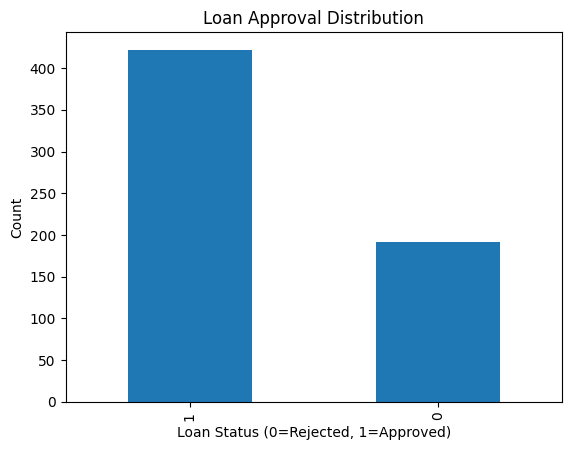

In [111]:
import matplotlib.pyplot as plt

df["Loan_Status"].value_counts().plot(kind="bar")
plt.title("Loan Approval Distribution")
plt.xlabel("Loan Status (0=Rejected, 1=Approved)")
plt.ylabel("Count")
plt.show()


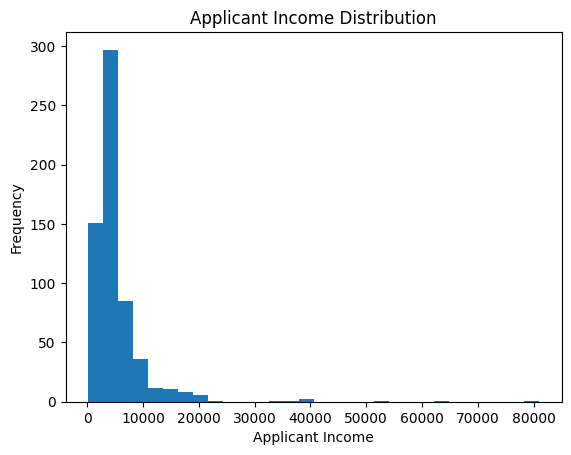

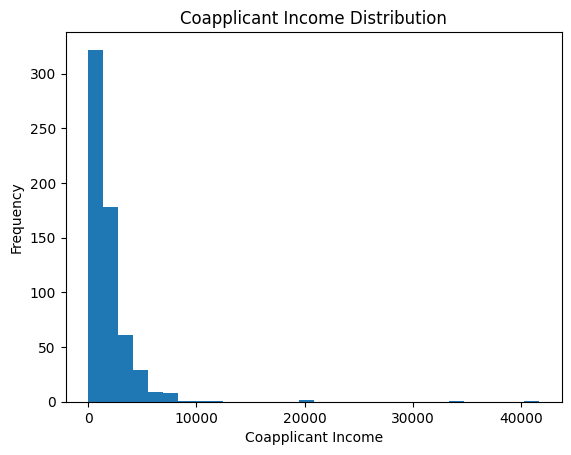

In [112]:
plt.hist(df["ApplicantIncome"], bins=30)
plt.title("Applicant Income Distribution")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

plt.hist(df["CoapplicantIncome"], bins=30)
plt.title("Coapplicant Income Distribution")
plt.xlabel("Coapplicant Income")
plt.ylabel("Frequency")
plt.show()


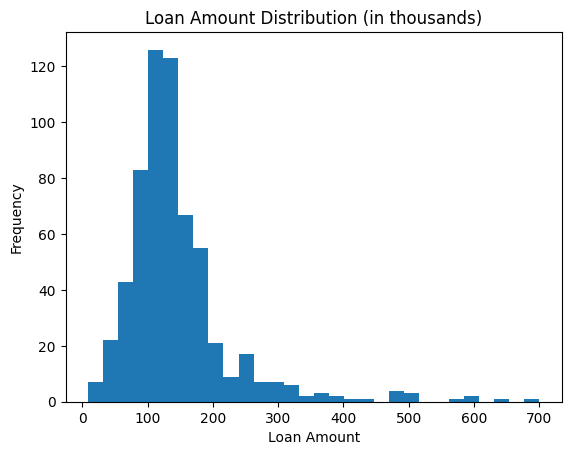

In [113]:
plt.hist(df["LoanAmount"], bins=30)
plt.title("Loan Amount Distribution (in thousands)")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()


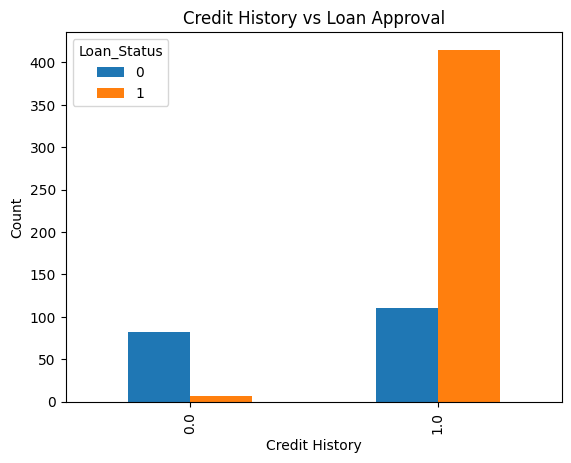

In [114]:
import pandas as pd

pd.crosstab(df["Credit_History"], df["Loan_Status"]).plot(kind="bar")
plt.title("Credit History vs Loan Approval")
plt.xlabel("Credit History")
plt.ylabel("Count")
plt.show()


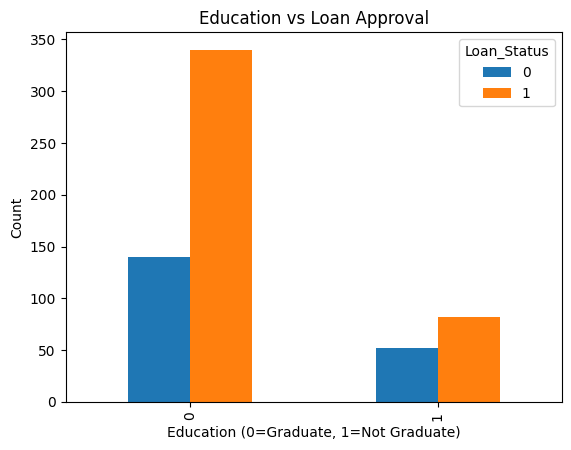

In [115]:
pd.crosstab(df["Education"], df["Loan_Status"]).plot(kind="bar")
plt.title("Education vs Loan Approval")
plt.xlabel("Education (0=Graduate, 1=Not Graduate)")
plt.ylabel("Count")
plt.show()


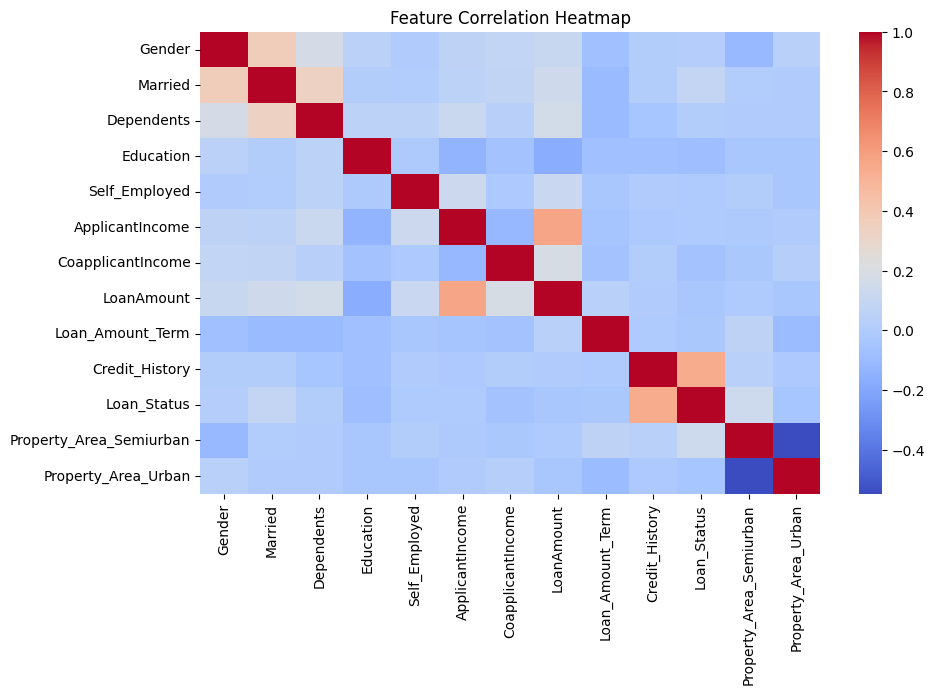

In [116]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


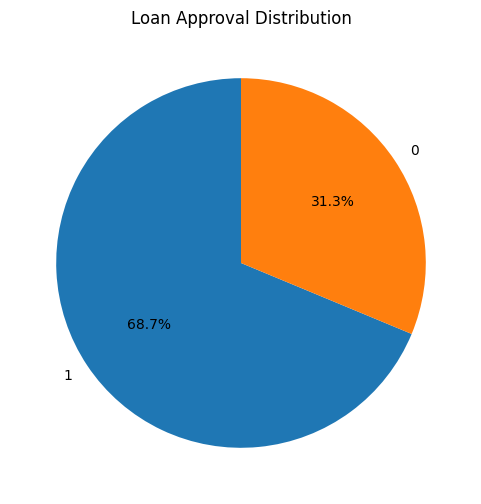

In [118]:
plt.figure(figsize=(6,6))
df["Loan_Status"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Loan Approval Distribution")
plt.ylabel("")
plt.show()


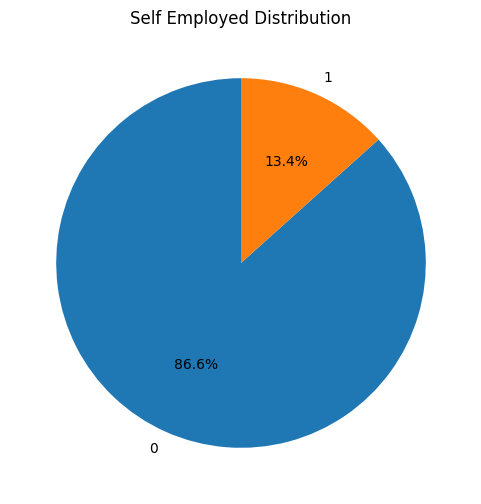

In [119]:
plt.figure(figsize=(6,6))
df["Self_Employed"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Self Employed Distribution")
plt.ylabel("")
plt.show()


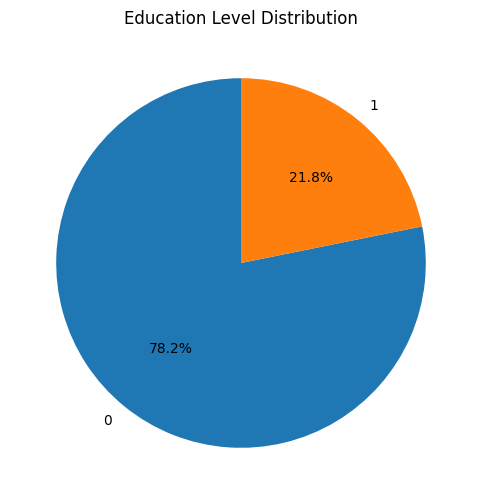

In [120]:
plt.figure(figsize=(6,6))
df["Education"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Education Level Distribution")
plt.ylabel("")
plt.show()


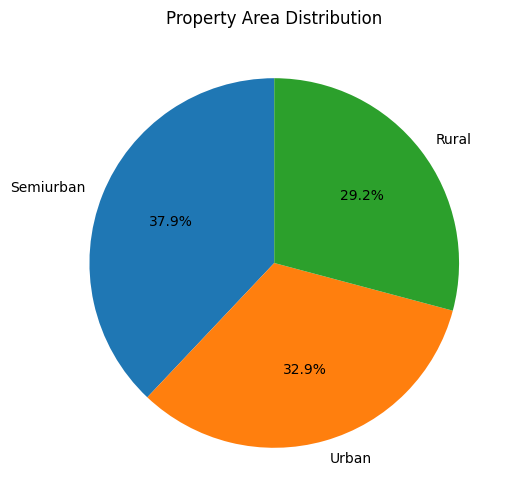

In [123]:
plt.figure(figsize=(6,6))

# Use original 'Property_Area' if present, otherwise reconstruct from one-hot columns
if "Property_Area" in df.columns:
    area_series = df["Property_Area"]
elif "Property_Area_Urban" in df.columns or "Property_Area_Semiurban" in df.columns:
    # vectorized reconstruction: Urban if Urban==True, else Semiurban if Semiurban==True, otherwise Rural
    area_series = pd.Series(
        np.where(df.get("Property_Area_Urban", False), "Urban",
                 np.where(df.get("Property_Area_Semiurban", False), "Semiurban", "Rural")),
        index=df.index
    )
else:
    raise KeyError("No 'Property_Area' or 'Property_Area_*' columns found in df")

area_series.value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Property Area Distribution")
plt.ylabel("")
plt.show()
